# March Madness 2024-25 EDA

This project explores data from the 2024-25 NCAA Men's Basketball season in preparation for March Madness. To that end, data from a cleaned Kaggle dataset is provided below and explored in detail. The goal of this repo is to provide ML models capable of predicting the winners of March Madness games given any two pairings of teams and potentially a whole bracket. You can find the bracket for the 2023-24 season below for reference. 

![Alt text](https://www.ncaa.com/_flysystem/public-s3/images/2024/12/06/2024-ncaa-tournament-bracket.jpg)

## Initializing

In [627]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Preprocessing

In [628]:
df = pd.read_csv('DEV _ March Madness.csv')
matchups = pd.read_csv('2025_NBA_full_schedule.csv')

Several additional files are included in the Github repo and the original Kaggle dataset. The description provided in Kaggle lists this file as the place where the cleaned and processed data from the other files was deposited.

In [629]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [630]:
pd.set_option('display.max_info_rows', 150)
pd.set_option('display.max_info_columns', 150)

Given the size of the dataset, it requires us to change the output settings so we can get all the columns and their types.

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8315 entries, 0 to 8314
Data columns (total 147 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    Season                                int64  
 1    Short Conference Name                 object 
 2    Adjusted Temo                         float64
 3    Adjusted Tempo Rank                   int64  
 4    Raw Tempo                             float64
 5    Raw Tempo Rank                        int64  
 6    Adjusted Offensive Efficiency         float64
 7    Adjusted Offensive Efficiency Rank    int64  
 8    Raw Offensive Efficiency              float64
 9    Raw Offensive Efficiency Rank         int64  
 10   Adjusted Defensive Efficiency         float64
 11   Adjusted Defensive Efficiency Rank    int64  
 12   Raw Defensive Efficiency              float64
 13   Raw Defensive Efficiency Rank         int64  
 14   Avg Possession Length (Offense)       float64
 15   Av

In [632]:
pd.set_option('display.max_columns', 150)
df.head()

Season Short Conference Name  Adjusted Temo  Adjusted Tempo Rank  \
0    2025                   ACC           66.1                  262   
1    2025                   SEC           68.6                  121   
2    2015                   SEC           62.4                  274   
3    2021                   WCC           73.8                    7   
4    2024                    BE           64.6                  330   

   Raw Tempo  Raw Tempo Rank  Adjusted Offensive Efficiency  \
0       66.4             270                          128.9   
1       69.4             111                          130.7   
2       63.8             242                          121.3   
3       74.3              14                          126.4   
4       66.0             305                          127.5   

   Adjusted Offensive Efficiency Rank  Raw Offensive Efficiency  \
0                                   2                     125.3   
1                                   1                     122.9   
2                                   6                     115.5   
3                                   1                     121.9   
4                                   1                     123.0   

   Raw Offensive Efficiency Rank  Adjusted Defensive Efficiency  \
0                              1                           89.8   
1                              2                           93.1   
2                              9                           84.4   
3                              1                           89.9   
4                              1                           91.1   

   Adjusted Defensive Efficiency Rank  Raw Defensive Efficiency  \
0                                   4                      92.1   
1                                  10                      99.2   
2                                   1                      84.7   
3                                  11                      93.4   
4                                   4                      96.4   

   Raw Defensive Efficiency Rank  Avg Possession Length (Offense)  \
0                              2                             17.0   
1                             34                             17.1   
2                              1                             17.7   
3                             17                             14.4   
4                              9                             18.6   

   Avg Possession Length (Offense) Rank  Avg Possession Length (Defense)  \
0                                 107.0                             19.1   
1                                 117.0                             17.7   
2                                  98.0                             19.6   
3                                   3.0                             18.0   
4                                 305.0                             17.5   

   Avg Possession Length (Defense) Rank     eFGPct  RankeFGPct      TOPct  \
0                                 363.0  57.663170           5  14.068787   
1                                 202.0  56.048835          20  13.025510   
2                                 327.0  51.511600          75  16.252900   
3                                 299.0  61.017812           1  16.127934   
4                                 183.0  56.907478           7  14.499681   

   RankTOPct      ORPct  RankORPct     FTRate  RankFTRate      OffFT  \
0         15  35.351351         30  32.284382         195  17.951907   
1          4  35.151515         34  33.962264         148  18.449738   
2         32  39.501200          8  43.860500          31  23.620700   
3         40  30.070636        102  35.725191          66  17.622810   
4         36  36.697966         12  31.939163         202  17.260442   

   RankOffFT   Off2PtFG  RankOff2PtFG   Off3PtFG  RankOff3PtFG      DefFT  \
0        245  44.859038           318  37.189055            53  17.146080   
1        209  48.607186           210  32.943076           140  23

The data seems to have loaded correctly. Given the amount of fields and the reality that I am not familiar with all these statistical features, it's possible that an object should be an double or vise versa. The dataset's data dictionary was consulted while inspecting these fields.

In [633]:
df.duplicated().sum()

0

In [634]:
df.dropna().reset_index(drop=True).shape

(0, 147)

All rows have null values in them.

In [635]:
pd.set_option('display.max_columns', 150)
null_columns = pd.DataFrame(df.isna().sum() / len(df)).T.loc[:, (pd.DataFrame(df.isna().sum() / len(df)).T != 0).all()]
print('Number of columns with nulls:', len(null_columns.columns))
null_columns

Number of columns with nulls: 62


Avg Possession Length (Offense)  Avg Possession Length (Offense) Rank  \
0                         0.320505                              0.320505   

   Avg Possession Length (Defense)  Avg Possession Length (Defense) Rank  \
0                         0.320505                              0.320505   

        DFP   NSTRate  RankNSTRate  OppNSTRate  RankOppNSTRate  AvgHeight  \
0  0.873001  0.740589     0.740589    0.740589        0.740589   0.197715   

   RankAvgHeight  CenterHeight  RankCenterHeight  PFHeight  RankPFHeight  \
0       0.197715      0.197715          0.197715  0.197715      0.197715   

   SFHeight  RankSFHeight  SGHeight  RankSGHeight  PGHeight  RankPGHeight  \
0  0.197715      0.197715  0.197715      0.197715  0.197715      0.197715   

   EffectiveHeight  RankEffectiveHeight  Experience  RankExperience     Bench  \
0         0.197715             0.197715    0.197715        0.197715  0.197715   

   BenchRank  CenterPts  RankCenterPts     PFPts  RankPFPts     SFPts  \
0   0.197715   0.197715       0.197715  0.197715   0.197715  0.197715   

   RankSFPts     SGPts  RankSGPts     PGPts  RankPGPts  CenterOR  \
0   0.197715  0.197715   0.197715  0.197715   0.197715  0.197715   

   RankCenterOR      PFOR  RankPFOR      SFOR  RankSFOR      SGOR  RankSGOR  \
0      0.197715  0.197715  0.197715  0.197715  0.197715  0.197715  0.197715   

       PGOR  RankPGOR  CenterDR  RankCenterDR      PFDR  RankPFDR      SFDR  \
0  0.197715  0.197715  0.197715      0.197715  0.197715  0.197715  0.197715   

   RankSFDR      SGDR  RankSGDR      PGDR  RankPGDR  Current Coach  \
0  0.197715  0.197715  0.197715  0.197715  0.197715       0.009982   

   Full Team Name     Since  Active Coaching Length  \
0        0.009982  0.009982                0.009982   

   Active Coaching Length Index  
0                      0.009982

The series was converted into wide data for an easier read in the above cell. Significant percentages from most of these fields are missing.

In [636]:
# df.fillna(value=0)

In [637]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [638]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

Code makes all columns lowercase and replaces any spaces with an underscore, as confirmed in the next cell.

In [639]:
df.columns

Index(['season', 'short_conference_name', 'adjusted_temo',
       'adjusted_tempo_rank', 'raw_tempo', 'raw_tempo_rank',
       'adjusted_offensive_efficiency', 'adjusted_offensive_efficiency_rank',
       'raw_offensive_efficiency', 'raw_offensive_efficiency_rank',
       ...
       'current_coach', 'full_team_name', 'since', 'active_coaching_length',
       'active_coaching_length_index', 'seed', 'region',
       'post-season_tournament', 'post-season_tournament_sorting_index',
       'top_12_in_ap_top_25_during_week_6?'],
      dtype='object', length=147)

The data and libraries have been successfully loaded and the nulls inspected. The columns were made into lowercase as well, so we will move onto the Exploratory Data Analysis (EDA) of this project.

## EDA

In [640]:
df = df.query('season==2025').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 147 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    season                                int64  
 1    short_conference_name                 object 
 2    adjusted_temo                         float64
 3    adjusted_tempo_rank                   int64  
 4    raw_tempo                             float64
 5    raw_tempo_rank                        int64  
 6    adjusted_offensive_efficiency         float64
 7    adjusted_offensive_efficiency_rank    int64  
 8    raw_offensive_efficiency              float64
 9    raw_offensive_efficiency_rank         int64  
 10   adjusted_defensive_efficiency         float64
 11   adjusted_defensive_efficiency_rank    int64  
 12   raw_defensive_efficiency              float64
 13   raw_defensive_efficiency_rank         int64  
 14   avg_possession_length_(offense)       float64
 15   avg_

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

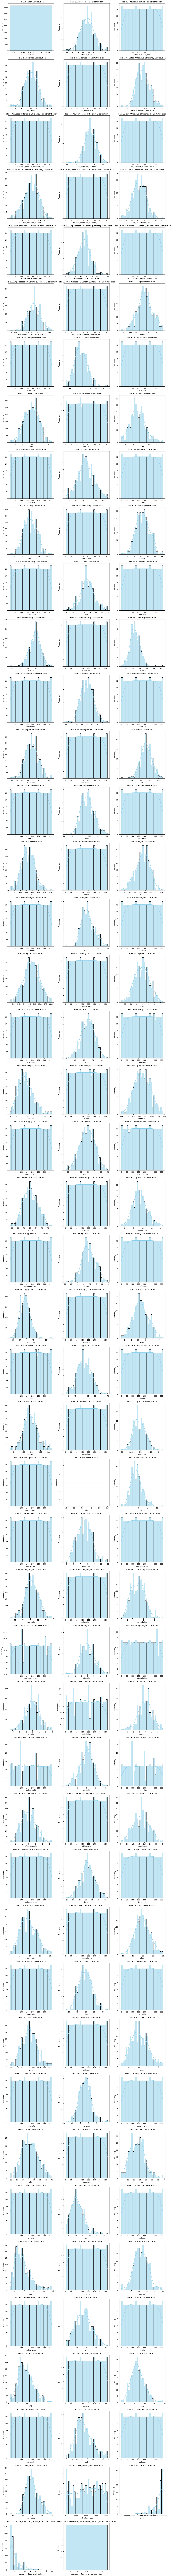

In [641]:
numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numeric columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate
i = 0 

# Plot a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    bins = 30
    if df[col].nunique() < bins and df[col].nunique() >= 1:
        bins = df[col].nunique()
    sns.histplot(df[col], kde=True, ax=axes[i], bins=bins, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Field {i}: {col.title()} Distribution')

# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

In [642]:
df.describe()

season  adjusted_temo  adjusted_tempo_rank   raw_tempo  raw_tempo_rank  \
count   364.0     364.000000           364.000000  364.000000      364.000000   
mean   2025.0      67.503846           182.500000   68.055769      182.500000   
std       0.0       2.460316           105.221988    2.468757      105.221988   
min    2025.0      59.400000             1.000000   59.800000        1.000000   
25%    2025.0      65.800000            91.750000   66.400000       91.750000   
50%    2025.0      67.500000           182.500000   68.100000      182.500000   
75%    2025.0      69.100000           273.250000   69.700000      273.250000   
max    2025.0      75.000000           364.000000   75.900000      364.000000   

       adjusted_offensive_efficiency  adjusted_offensive_efficiency_rank  \
count                     364.000000                          364.000000   
mean                      107.344231                          182.500000   
std                         7.558123                          105.221988   
min                        82.200000                            1.000000   
25%                       101.900000                           91.750000   
50%                       106.900000                          182.500000   
75%                       111.900000                          273.250000   
max                       130.700000                          364.000000   

       raw_offensive_efficiency  raw_offensive_efficiency_rank  \
count                364.000000                     364.000000   
mean                 106.105769                     182.500000   
std                    6.405967                     105.221988   
min                   78.200000                       1.000000   
25%                  102.050000                      91.750000   
50%                  105.700000                     182.500000   
75%                  110.100000                     273.250000   
max                  125.300000                     364.000000   

       adjusted_defensive_efficiency  adjusted_defensive_efficiency_rank  \
count                     364.000000                          364.000000   
mean                      107.343681                          182.500000   
std                         6.769050                          105.221988   
min                        87.200000                            1.000000   
25%                       103.075000                           91.750000   
50%                       107.600000                          182.500000   
75%                       112.100000                          273.250000   
max                       126.800000                          364.000000   

       raw_defensive_efficiency  raw_defensive_efficiency_rank  \
count                364.000000                     364.000000   
mean                 106.201648                     182.500000   
std                    5.583634                     105.221988   
min                   91.300000                       1.000000   
25%                  102.600000                      91.750000   
50%                  106.300000                     182.500000   
75%                  110.025000                     273.250000   
max                  126.200000                     364.000000   

       avg_possession_length_(offense)  avg_possession_length_(offense)_rank  \
count                       364.000000                            364.000000   
mean                         17.634890                            182.500000   
std                           1.152392                            105.221988   
min                          14.200000                              1.000000   
25%                          16.900000                             91.750000   
50%                          17.600000                            182.500000   
75%                          18.300000                            273.250000   
max                          21.900000                            364.000000 

In [643]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

dfp                                   1.0
season                                0.0
bench                                 0.0
pgheight                              0.0
rankpgheight                          0.0
                                     ... 
rankadjde                             0.0
adjem                                 0.0
rankadjem                             0.0
fg2pct                                0.0
top_12_in_ap_top_25_during_week_6?    0.0
Length: 147, dtype: float64

In [644]:
df = df.drop(columns='dfp')

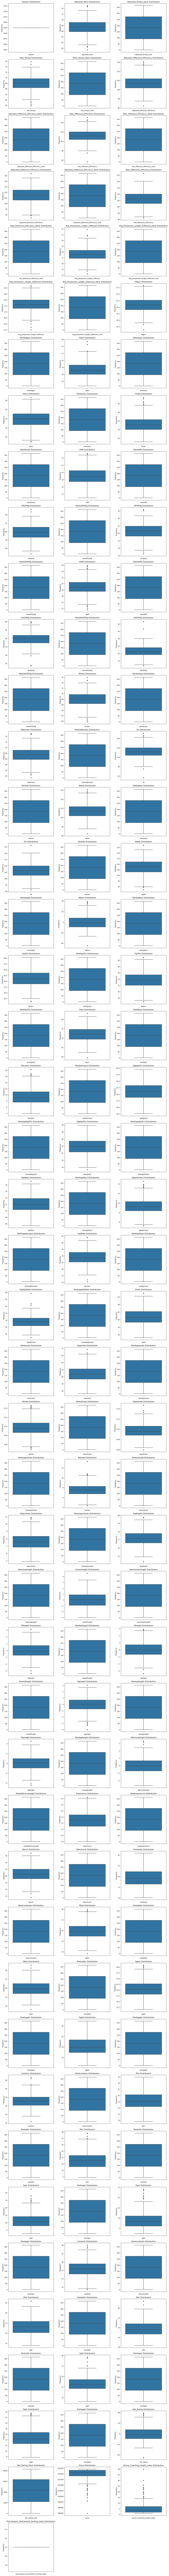

In [645]:
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate
i = 0

# Plot a boxplot for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])  
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col.title()} Distribution')
    
# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
   axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

Some of these fields do have outliers, but outliers when tracking a societal event are to be expected and do not indicate a concern about the validity or accurateness of the data. Plots that showed no distibution of data and were thus represented by a single line, likely represents the reality that we're only using one year's worth of data.

In [646]:
df.describe()

season  adjusted_temo  adjusted_tempo_rank   raw_tempo  raw_tempo_rank  \
count   364.0     364.000000           364.000000  364.000000      364.000000   
mean   2025.0      67.503846           182.500000   68.055769      182.500000   
std       0.0       2.460316           105.221988    2.468757      105.221988   
min    2025.0      59.400000             1.000000   59.800000        1.000000   
25%    2025.0      65.800000            91.750000   66.400000       91.750000   
50%    2025.0      67.500000           182.500000   68.100000      182.500000   
75%    2025.0      69.100000           273.250000   69.700000      273.250000   
max    2025.0      75.000000           364.000000   75.900000      364.000000   

       adjusted_offensive_efficiency  adjusted_offensive_efficiency_rank  \
count                     364.000000                          364.000000   
mean                      107.344231                          182.500000   
std                         7.558123                          105.221988   
min                        82.200000                            1.000000   
25%                       101.900000                           91.750000   
50%                       106.900000                          182.500000   
75%                       111.900000                          273.250000   
max                       130.700000                          364.000000   

       raw_offensive_efficiency  raw_offensive_efficiency_rank  \
count                364.000000                     364.000000   
mean                 106.105769                     182.500000   
std                    6.405967                     105.221988   
min                   78.200000                       1.000000   
25%                  102.050000                      91.750000   
50%                  105.700000                     182.500000   
75%                  110.100000                     273.250000   
max                  125.300000                     364.000000   

       adjusted_defensive_efficiency  adjusted_defensive_efficiency_rank  \
count                     364.000000                          364.000000   
mean                      107.343681                          182.500000   
std                         6.769050                          105.221988   
min                        87.200000                            1.000000   
25%                       103.075000                           91.750000   
50%                       107.600000                          182.500000   
75%                       112.100000                          273.250000   
max                       126.800000                          364.000000   

       raw_defensive_efficiency  raw_defensive_efficiency_rank  \
count                364.000000                     364.000000   
mean                 106.201648                     182.500000   
std                    5.583634                     105.221988   
min                   91.300000                       1.000000   
25%                  102.600000                      91.750000   
50%                  106.300000                     182.500000   
75%                  110.025000                     273.250000   
max                  126.200000                     364.000000   

       avg_possession_length_(offense)  avg_possession_length_(offense)_rank  \
count                       364.000000                            364.000000   
mean                         17.634890                            182.500000   
std                           1.152392                            105.221988   
min                          14.200000                              1.000000   
25%                          16.900000                             91.750000   
50%                          17.600000                            182.500000   
75%                          18.300000                            273.250000   
max                          21.900000                            364.000000 

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



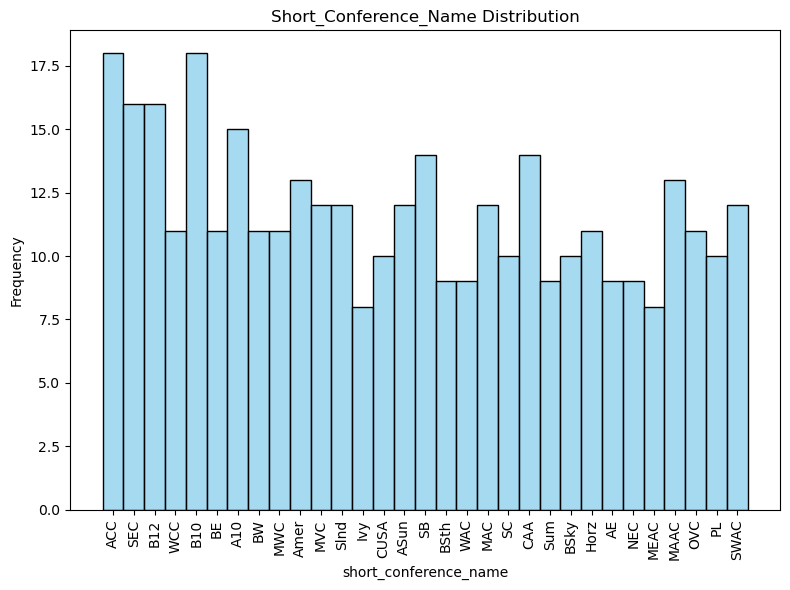

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



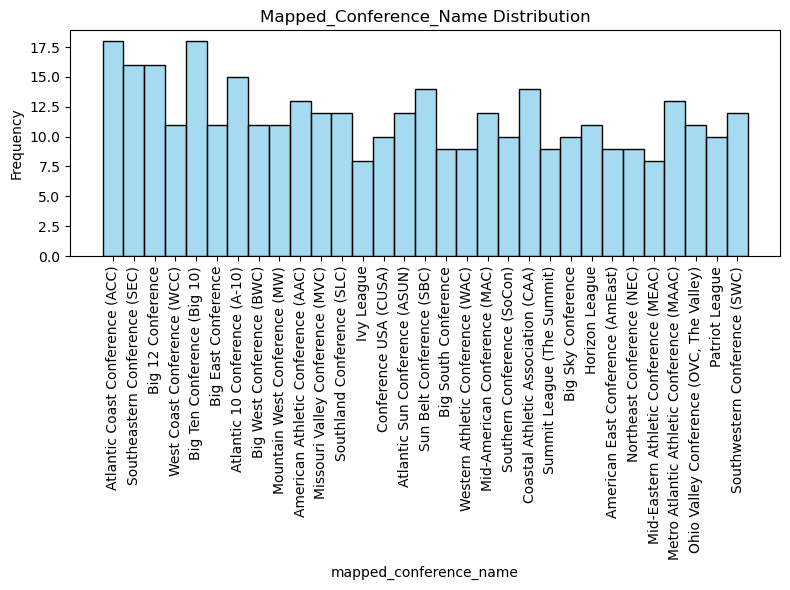

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



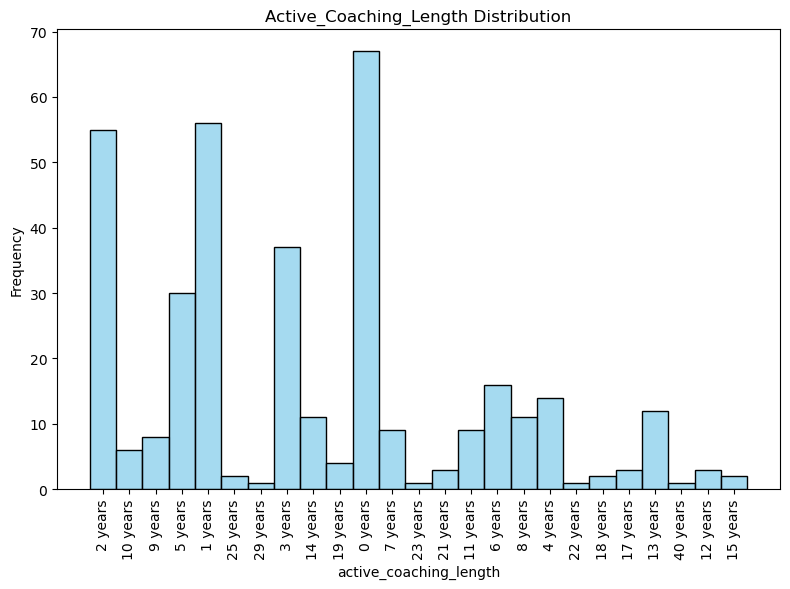

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



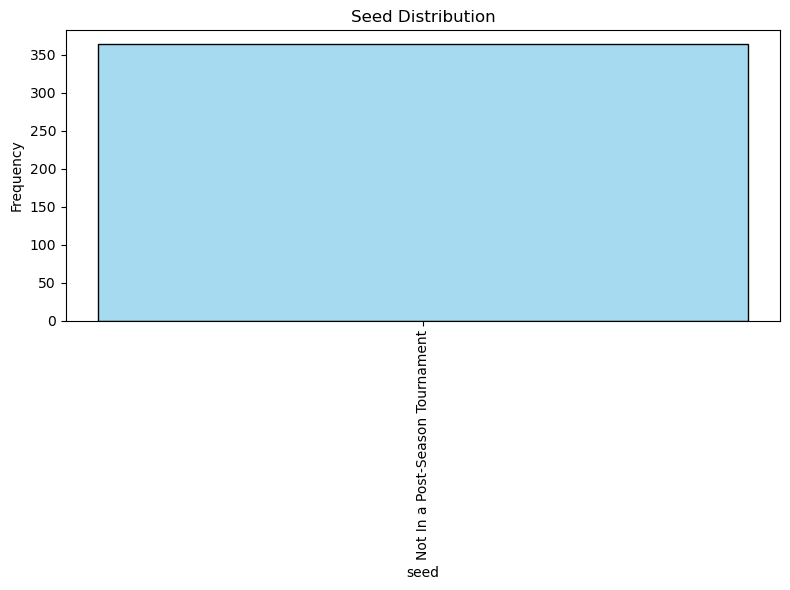

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



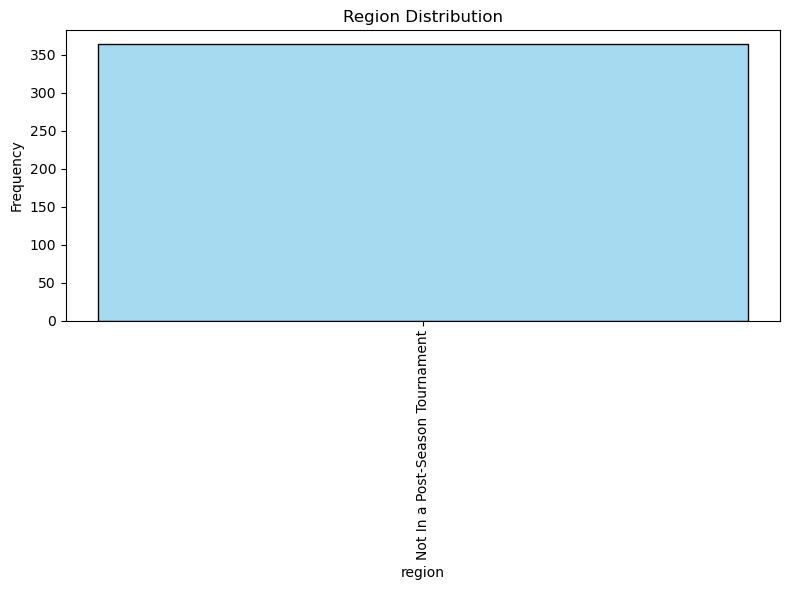

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



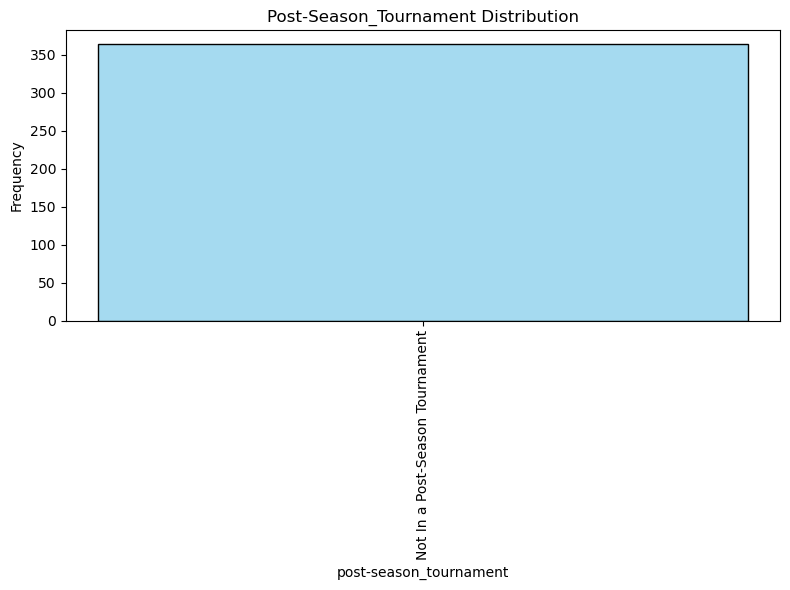

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



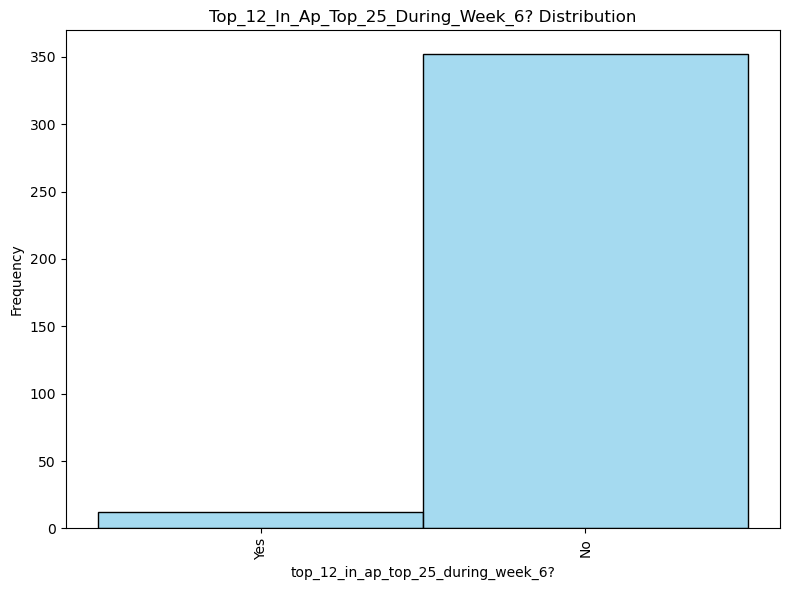

In [647]:
# Select only object columns
object_columns = df.select_dtypes(include=['object']).columns

# Loop through each column and plot one plot at a time
for i, col in enumerate(object_columns):
    if i not in {2, 3, 4}:
        plt.figure(figsize=(8, 6))  # Create a new figure for each plot
        bins = 30
        if df[col].nunique() < bins:
            bins = df[col].nunique()
        
        # Plot the histogram
        sns.histplot(df[col], bins=bins, color='skyblue', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'{col.title()} Distribution')
        
        # Rotate x-axis labels if needed
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()  # Loop will display each plot one by one


Each object field was provided with its own plot and blown up given the number of possible values and the fact that unique text values cannot be represented in the same bin together. Some of this data would need to be encoded. Other fields like active_coaching_length can be converted to an int rather easily. But it's easier to just drop the fields not viewed as useful for modeling.

In [648]:
df['full_team_name'].nunique()

364

In [649]:
import plotly.express as px

corr_matrix = df[df.select_dtypes(include=[np.number]).columns].corr()

fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r', title='Interactive Correlation Heatmap', width=900, height=900)
fig.update_xaxes(side="top")
fig.show()

I don't find the above heatmap particularly helpful, though the fact that the plot is interactive is useful. I include tables for the correllation of these variables below.

In [650]:
threshold = 0.7

strong_correlations = []

# Loop over the correlation matrix and get correlations above the threshold
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):  
        if abs(corr_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Show the strong correlations
print("Strong correlations (Above threshold):")

strong_corr_df = pd.DataFrame(strong_correlations, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(strong_corr_df)

Strong correlations (Above threshold):
         Feature 1                             Feature 2  Correlation
0    adjusted_temo                   adjusted_tempo_rank    -0.970646
1    adjusted_temo                             raw_tempo     0.976773
2    adjusted_temo                        raw_tempo_rank    -0.947168
3    adjusted_temo       avg_possession_length_(offense)    -0.894027
4    adjusted_temo  avg_possession_length_(offense)_rank    -0.867826
..             ...                                   ...          ...
307           sfdr                              ranksfdr    -0.969620
308           sgdr                              ranksgdr    -0.965946
309           pgdr                              rankpgdr    -0.969057
310     net_rating                       net_rating_rank    -0.974304
311          since          active_coaching_length_index    -0.999959

[312 rows x 3 columns]


In [651]:
strong_corr_df['Feature 1'].value_counts() [:30]

Feature 1
adjusted_offensive_efficiency         13
raw_offensive_efficiency              13
adjusted_offensive_efficiency_rank    12
raw_offensive_efficiency_rank         12
adjusted_defensive_efficiency         11
avgheight                             10
adjusted_defensive_efficiency_rank    10
adjusted_temo                          9
efgpct                                 9
raw_defensive_efficiency               9
oe                                     9
rankavgheight                          8
rankoe                                 8
rankefgpct                             8
adjusted_tempo_rank                    8
de                                     7
raw_tempo                              7
raw_defensive_efficiency_rank          6
raw_tempo_rank                         6
def2ptfg                               5
topct                                  5
adjoe                                  5
avg_possession_length_(offense)        5
adjde                                  5
off2pt

### Explanation of Columns in the Data:

The following columns have been selected to analyze team performance for the 2025 season:

1. **teamname**: The name of the team participating in the analysis.
2. **efgpct_x**: The effective field goal percentage, a metric that adjusts the field goal percentage to account for the added value of three-point shots.
7. **adjusted_offensive_efficiency**: The adjusted offensive efficiency, which measures the team's offensive output per 100 possessions, accounting for the strength of the team's opponents.
8. **adjusted_defensive_efficiency**: The adjusted defensive efficiency, which measures how effectively the team defends per 100 possessions, considering the strength of their opponents.


We will be dropping the other columns

In [652]:
# reducing columns
columns_keep = [
    'season',  # commented it out since only looking at 2025
    'full_team_name',  
    'efgpct',  
    'adjusted_offensive_efficiency',  
    'adjusted_defensive_efficiency',   
]

# reducing data to these features
df = df[columns_keep]

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   season                         int64  
 1   full_team_name                 object 
 2   efgpct                         float64
 3   adjusted_offensive_efficiency  float64
 4   adjusted_defensive_efficiency  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.3+ KB


In [654]:
df.season.unique()

array([2025], dtype=int64)

### Encoding

In [655]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [656]:
df_ord = df.copy()
encoder = OrdinalEncoder()
df_ord['full_team_name'] = encoder.fit_transform(df_ord[['full_team_name']])
df_ord.sample(5)

season  full_team_name     efgpct  adjusted_offensive_efficiency  \
73     2025           143.0  56.903915                          109.2   
162    2025           196.0  48.875380                          108.2   
227    2025           234.0  51.291745                          105.2   
191    2025           168.0  52.124563                          114.1   
118    2025           134.0  49.017802                          106.9   

     adjusted_defensive_efficiency  
73                            98.2  
162                          108.2  
227                          110.7  
191                          116.5  
118                          103.0

c:\Users\Joshua\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



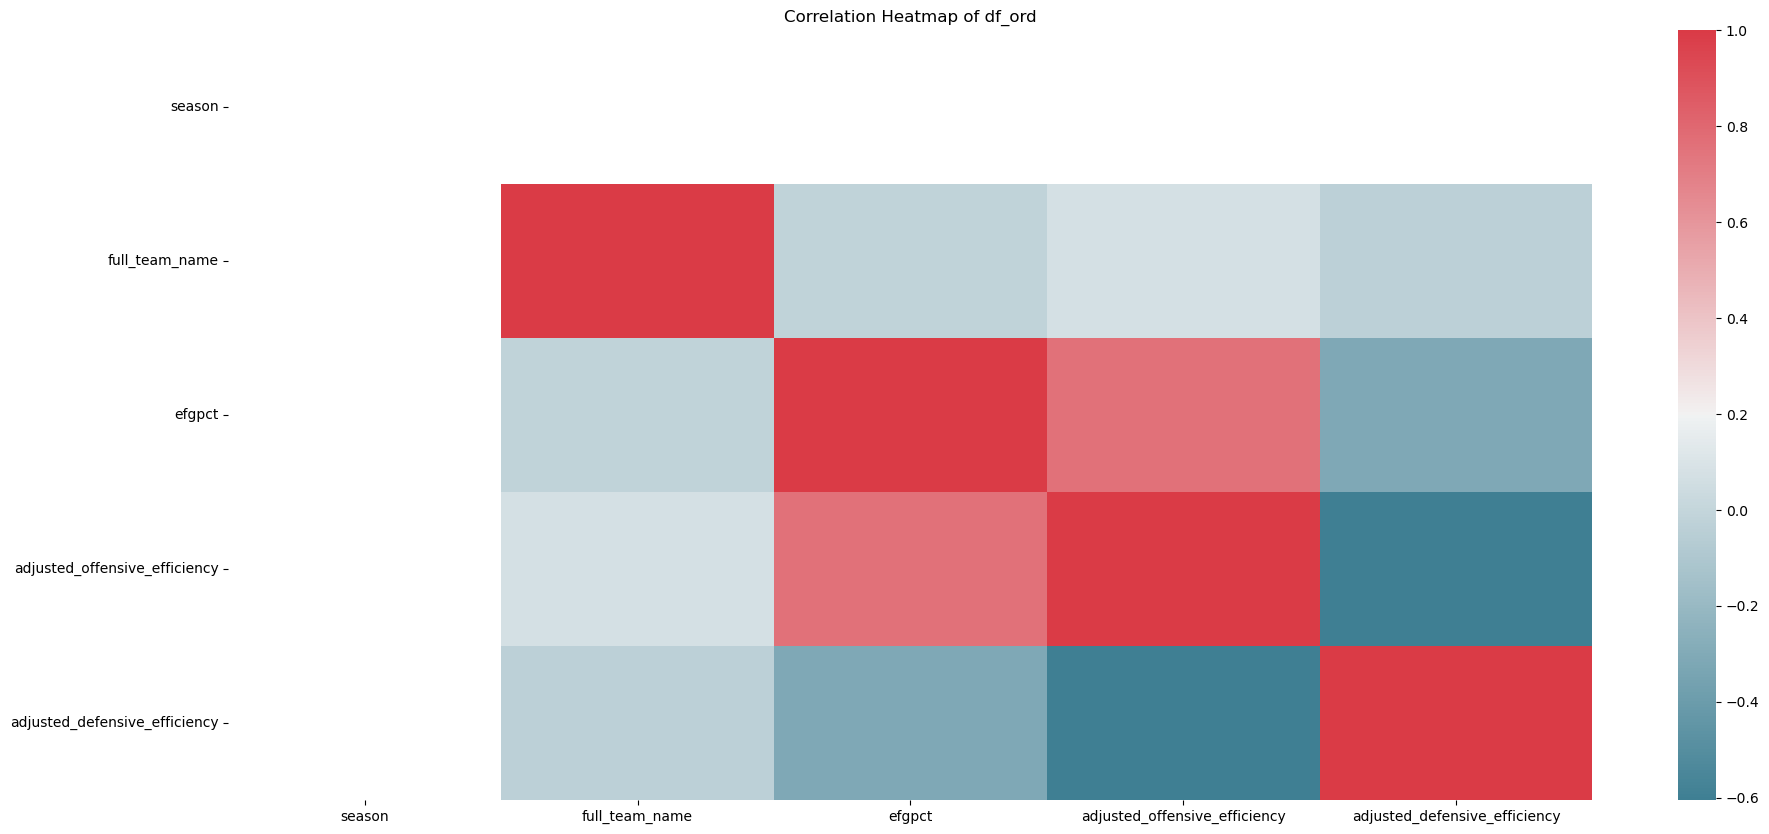

In [657]:
numerical_columns = df_ord.select_dtypes(include=[np.number])
corr = numerical_columns.corr()
plt.figure(figsize=(22, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)
plt.title(label='Correlation Heatmap of df_ord')
plt.show()

### Settting up DF for model training


In [658]:
teams64 = [
    "Auburn Tigers", "Duke Blue Devils", "Houston Cougars", "Tennessee Volunteers", "Kansas Jayhawks",
    "Alabama Crimson Tide", "UConn Huskies", "Iowa State Cyclones", "Gonzaga Bulldogs", "Baylor Bears",
    "Arizona Wildcats", "North Carolina Tar Heels", "Purdue Boilermakers", "Creighton Bluejays", "Texas A&M Aggies",
    "Arkansas Razorbacks", "Marquette Golden Eagles", "Indiana Hoosiers", "Texas Longhorns", "Cincinnati Bearcats",
    "Florida Gators", "UCLA Bruins", "Kentucky Wildcats", "Illinois Fighting Illini", "Ole Miss Rebels",
    "Michigan State Spartans", "Missouri Tigers", "St. John's Red Storm", "Drake Bulldogs", "SIU Edwardsville Cougars",
    "High Point Panthers", "Lipscomb Bisons", "Omaha Mavericks", "Bradley Braves", "Winthrop Eagles",
    "North Alabama Lions", "St. Thomas Tommies", "Southeast Missouri State Redhawks", "Nebraska Cornhuskers",
    "Iowa Hawkeyes", "Georgia Bulldogs", "Oklahoma Sooners", "Ohio State Buckeyes", "Indiana Hoosiers",
    "Michigan Wolverines", "Wisconsin Badgers", "Maryland Terrapins", "Rutgers Scarlet Knights", "Penn State Nittany Lions",
    "Minnesota Golden Gophers", "Northwestern Wildcats", "Illinois Fighting Illini", "Purdue Boilermakers",
    "Michigan State Spartans", "Nebraska Cornhuskers", "Iowa Hawkeyes", "Missouri Tigers", "Florida Gators",
    "Kentucky Wildcats", "Alabama Crimson Tide", "Tennessee Volunteers"
]


In [659]:
df.columns = df.columns.str.strip()

In [660]:
matchups = matchups[['team (W or L references this team)', 'opponent', 'outcome']]
# Rename the column
matchups.rename(columns={'team (W or L references this team)': 'team'}, inplace=True)

In [661]:
# Clean opponent column to remove numbers and symbols, keeping only letters and spaces
matchups['opponent'] = matchups['opponent'].apply(lambda x: re.sub(r'[^A-Za-z ]', '', x))

In [662]:
matchups.head()

team          opponent outcome
0  Abilene Christian Wildcats      Howard Payne       1
1  Abilene Christian Wildcats  Middle Tennessee       0
2  Abilene Christian Wildcats           McMurry       1
3  Abilene Christian Wildcats       Texas State       1
4  Abilene Christian Wildcats    Kennesaw State       0

In [663]:
# Filter the matchups DataFrame where the team is in the teams list
filtered_matchups = matchups[matchups['team'].isin(teams64)]

# Display the filtered matchups
print(filtered_matchups)

                       team         opponent outcome
124    Alabama Crimson Tide    UNC Asheville       1
125    Alabama Crimson Tide   Arkansas State       1
126    Alabama Crimson Tide          McNeese       1
127    Alabama Crimson Tide           Purdue       0
128    Alabama Crimson Tide        Illinois        1
...                     ...              ...     ...
10843     Wisconsin Badgers           Oregon       0
10844     Wisconsin Badgers       Washington       1
10845     Wisconsin Badgers   Michigan State       0
10846     Wisconsin Badgers        Minnesota       1
10847     Wisconsin Badgers       Penn State       0

[1544 rows x 3 columns]


In [670]:
# Filter the matchups DataFrame where the opponent is contained in the full_team_name column of 'df'
filtered_matchups = matchups[matchups['opponent'].apply(lambda x: any(team in x for team in df['full_team_name']))]

# Display the filtered DataFrame
print(filtered_matchups)

Empty DataFrame
Columns: [team, opponent, outcome]
Index: []


In [665]:
merged_data = pd.merge(filtered_matchups, df, left_on='team', right_on='full_team_name', how='left')

In [666]:
merged_data.head(10)

team         opponent outcome  season  \
0  Alabama Crimson Tide    UNC Asheville       1  2025.0   
1  Alabama Crimson Tide   Arkansas State       1  2025.0   
2  Alabama Crimson Tide          McNeese       1  2025.0   
3  Alabama Crimson Tide           Purdue       0  2025.0   
4  Alabama Crimson Tide        Illinois        1  2025.0   
5  Alabama Crimson Tide         Houston        1  2025.0   
6  Alabama Crimson Tide         Rutgers        1  2025.0   
7  Alabama Crimson Tide          Oregon        0  2025.0   
8  Alabama Crimson Tide   North Carolina       1  2025.0   
9  Alabama Crimson Tide        Creighton       1  2025.0   

         full_team_name    efgpct  adjusted_offensive_efficiency  \
0  Alabama Crimson Tide  56.57112                          127.3   
1  Alabama Crimson Tide  56.57112                          127.3   
2  Alabama Crimson Tide  56.57112                          127.3   
3  Alabama Crimson Tide  56.57112                          127.3   
4  Alabama Crimson Tide  56.57112                          127.3   
5  Alabama Crimson Tide  56.57112                          127.3   
6  Alabama Crimson Tide  56.57112                          127.3   
7  Alabama Crimson Tide  56.57112                          127.3   
8  Alabama Crimson Tide  56.57112                          127.3   
9  Alabama Crimson Tide  56.57112                          127.3   

   adjusted_defensive_efficiency  
0                           97.9  
1                           97.9  
2                           97.9  
3                           97.9  
4                           97.9  
5                           97.9  
6                           97.9  
7                           97.9  
8                           97.9  
9                           97.9

In [667]:
merged_data.head()

team        opponent outcome  season        full_team_name  \
0  Alabama Crimson Tide   UNC Asheville       1  2025.0  Alabama Crimson Tide   
1  Alabama Crimson Tide  Arkansas State       1  2025.0  Alabama Crimson Tide   
2  Alabama Crimson Tide         McNeese       1  2025.0  Alabama Crimson Tide   
3  Alabama Crimson Tide          Purdue       0  2025.0  Alabama Crimson Tide   
4  Alabama Crimson Tide       Illinois        1  2025.0  Alabama Crimson Tide   

     efgpct  adjusted_offensive_efficiency  adjusted_defensive_efficiency  
0  56.57112                          127.3                           97.9  
1  56.57112                          127.3                           97.9  
2  56.57112                          127.3                           97.9  
3  56.57112                          127.3                           97.9  
4  56.57112                          127.3                           97.9

In [671]:
unique_opp = merged_data['opponent'].str.lower().unique()

In [672]:
len(unique_opp)

454

In [673]:
print(unique_opp)

['unc asheville' 'arkansas state' 'mcneese' ' purdue' ' illinois '
 ' houston ' 'rutgers ' 'oregon ' ' north carolina' 'creighton'
 'north dakota' 'kent state' 'south dakota state' ' oklahoma'
 'south carolina' ' texas am' ' ole miss' ' kentucky' 'vanderbilt' 'lsu'
 ' mississippi state' 'georgia' 'arkansas' 'texas' ' auburn' ' missouri'
 ' tennessee' ' florida' 'canisius' 'old dominion' 'wisconsin' ' duke'
 'davidson ' 'oklahoma ' 'west virginia ' 'southern utah' ' ucla '
 'samford' 'central michigan' 'tcu' ' cincinnati' ' west virginia' 'ucf'
 ' baylor' 'texas tech' 'oklahoma state' 'colorado' ' iowa state'
 'arizona state' 'byu' ' texas tech' 'kansas state' ' houston' 'baylor'
 'utah' 'kansas' 'lipscomb' ' baylor ' 'troy' 'pacific' 'little rock'
 'maryland eastern shore' 'illinois ' 'miami' 'utsa' ' michigan '
 'central arkansas ' 'north carolina at' 'oakland' 'missouri' 'oklahoma'
 ' alabama' 'vermont' 'north alabama' ' iowa state ' ' north carolina '
 'memphis ' 'richmond' 'ohio st